In [ ]:
from IPython.display import clear_output
#!pip install plotly --upgrade
#!pip install catboost

clear_output()

# Import necessary libraries

In [ ]:
import numpy as np  # Import NumPy for handling numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import warnings  # Import Warnings to suppress unnecessary warnings

# Suppress warning messages
warnings.filterwarnings("ignore")

# Load The Dataset

In [ ]:
df=pd.read_csv("/content/world_real_estate_data(147k).csv")

# Dataset Overview

In [ ]:
df.head()

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...


In [ ]:
df.tail()

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310 m²,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192 m²,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...
147533,"2 room apartment in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",NaN,NaN,NaN,3.0,2.0,2.0,NaN,84 m²,477146.0,https://realting.com/uploads/bigSlider/4ae/9d8...,https://realting.com/property-for-sale/turkey/...
147534,"Apartment in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819163.0,https://realting.com/uploads/bigSlider/164/7e6...,https://realting.com/property-for-sale/turkey/...
147535,"4 room apartment 140 m² in, Turkey",Turkey,Turkey,NaN,2.0,NaN,5.0,4.0,NaN,140 m²,NaN,939164.0,https://realting.com/uploads/bigSlider/fab/0eb...,https://realting.com/property-for-sale/turkey/...


In [ ]:
df

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310 m²,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192 m²,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...
147533,"2 room apartment in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",NaN,NaN,NaN,3.0,2.0,2.0,NaN,84 m²,477146.0,https://realting.com/uploads/bigSlider/4ae/9d8...,https://realting.com/property-for-sale/turkey/...
147534,"Apartment in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819163.0,https://realting.com/uploads/bigSlider/164/7e6...,https://realting.com/property-for-sale/turkey/...


# Basic EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [ ]:
df.describe()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD
count,64719.000000,68224.000000,54592.000000,74178.000000,36982.000000,55973.000000,1.449610e+05
mean,1996.921754,8.575692,5.791709,2.572097,2.289222,1.364229,4.121722e+05
std,157.527635,8.356781,5.541368,1.319545,18.276913,0.745019,8.420984e+05
min,1.000000,-1.000000,-2.000000,-1.000000,-1.000000,1.000000,0.000000e+00
25%,2004.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.054200e+05
50%,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,1.902120e+05
75%,2024.000000,14.000000,8.000000,3.000000,3.000000,2.000000,3.989300e+05
max,2316.000000,124.000000,202.000000,124.000000,2009.000000,43.000000,3.060283e+07


In [ ]:
df.shape


(147536, 14)

# Check the number of duplicate rows

In [ ]:
# Check the number of duplicate rows
duplicate_count = df.duplicated().sum()

In [ ]:
duplicate_count

0

In [ ]:
df['building_construction_year'].value_counts()

2023.0    9038
2025.0    8544
2024.0    6001
2026.0    4490
2022.0    3812
          ... 
1845.0       1
1834.0       1
1782.0       1
1751.0       1
202.0        1
Name: building_construction_year, Length: 224, dtype: int64

In [ ]:
df['price_in_USD'].value_counts()

380425.0    503
489118.0    420
326078.0    419
347817.0    366
271732.0    361
           ... 
70115.0       1
80688.0       1
81978.0       1
78311.0       1
939164.0      1
Name: price_in_USD, Length: 49327, dtype: int64

In [ ]:
df['apartment_total_area'].value_counts()

100 m²      2468
60 m²       2425
50 m²       2261
55 m²       2112
120 m²      2106
            ... 
1 780 m²       1
1 410 m²       1
966 m²         1
748 m²         1
1 850 m²       1
Name: apartment_total_area, Length: 1492, dtype: int64

# Now i check the missing values in this dataset

In [ ]:
df.isnull().sum()

title                              0
country                          130
location                         131
building_construction_year     82817
building_total_floors          79312
apartment_floor                92944
apartment_rooms                73358
apartment_bedrooms            110554
apartment_bathrooms            91563
apartment_total_area            5740
apartment_living_area         119824
price_in_USD                    2575
image                              0
url                                0
dtype: int64

In [ ]:
df.corr()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD
building_construction_year,1.000000,0.096658,0.085043,-0.053854,-0.041845,-0.022095,0.000617
building_total_floors,0.096658,1.000000,0.709739,-0.125420,-0.094493,-0.030828,-0.024754
apartment_floor,0.085043,0.709739,1.000000,-0.105771,-0.045982,-0.026766,-0.009395
apartment_rooms,-0.053854,-0.125420,-0.105771,1.000000,0.720481,0.452677,0.279506
apartment_bedrooms,-0.041845,-0.094493,-0.045982,0.720481,1.000000,0.048195,0.017441
apartment_bathrooms,-0.022095,-0.030828,-0.026766,0.452677,0.048195,1.000000,0.419841
price_in_USD,0.000617,-0.024754,-0.009395,0.279506,0.017441,0.419841,1.000000


# Data Cleaning

# Fill missing values for numerical columns with their median


In [ ]:
df = df[~df['apartment_total_area'].isnull()]

In [ ]:
df

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
5,"1 room apartment 28 m² in Batumi, Georgia",Georgia,"Abkhazia, Batumi, Georgia",2026.0,NaN,NaN,1.0,NaN,1.0,28 m²,NaN,35622.0,https://realting.com/uploads/bigSlider/16f/406...,https://realting.com/property-for-sale/georgia...
6,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007.0,2.0,3.0,5.0,4.0,4.0,245 m²,245 m²,274415.0,https://realting.com/uploads/bigSlider/9c8/6f1...,https://realting.com/property-for-sale/turkey/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147529,"3 room apartment 106 m² in Yaylali, Turkey",Turkey,"Yaylali, Mediterranean Region, Alanya, Turkey",2023.0,NaN,NaN,3.0,NaN,1.0,106 m²,NaN,510856.0,https://realting.com/uploads/bigSlider/5c4/8dc...,https://realting.com/property-for-sale/turkey/...
147530,3 room apartment 168 m² in Bahcelievler Mahall...,Turkey,"Bahcelievler Mahallesi, Marmara Region, Turkey",NaN,NaN,NaN,NaN,3.0,NaN,168 m²,NaN,614848.0,https://realting.com/uploads/bigSlider/c9c/46f...,https://realting.com/property-for-sale/turkey/...
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310 m²,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192 m²,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...


In [ ]:
# Extract total area number (in m2)
df['apartment_total_area'] = df['apartment_total_area'].apply(lambda x: int(str(x).rstrip(" m²").replace(' ','')))
df

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
5,"1 room apartment 28 m² in Batumi, Georgia",Georgia,"Abkhazia, Batumi, Georgia",2026.0,NaN,NaN,1.0,NaN,1.0,28,NaN,35622.0,https://realting.com/uploads/bigSlider/16f/406...,https://realting.com/property-for-sale/georgia...
6,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007.0,2.0,3.0,5.0,4.0,4.0,245,245 m²,274415.0,https://realting.com/uploads/bigSlider/9c8/6f1...,https://realting.com/property-for-sale/turkey/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147529,"3 room apartment 106 m² in Yaylali, Turkey",Turkey,"Yaylali, Mediterranean Region, Alanya, Turkey",2023.0,NaN,NaN,3.0,NaN,1.0,106,NaN,510856.0,https://realting.com/uploads/bigSlider/5c4/8dc...,https://realting.com/property-for-sale/turkey/...
147530,3 room apartment 168 m² in Bahcelievler Mahall...,Turkey,"Bahcelievler Mahallesi, Marmara Region, Turkey",NaN,NaN,NaN,NaN,3.0,NaN,168,NaN,614848.0,https://realting.com/uploads/bigSlider/c9c/46f...,https://realting.com/property-for-sale/turkey/...
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...


In [ ]:
df['apartment_floor'].value_counts()

1.0      9151
2.0      7914
3.0      6783
4.0      5332
5.0      4408
         ... 
62.0        1
58.0        1
202.0       1
66.0        1
54.0        1
Name: apartment_floor, Length: 70, dtype: int64

# replace -1 apartment_floor to np.nan

In [ ]:
# replace -1,-2 apartment_floor to np.nan
# 'df' is your DataFrame
df['apartment_floor'] = df['apartment_floor'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
df['apartment_floor'].value_counts()

1.0      9151
2.0      7914
3.0      6783
4.0      5332
5.0      4408
         ... 
62.0        1
58.0        1
202.0       1
66.0        1
54.0        1
Name: apartment_floor, Length: 68, dtype: int64

# Now location Column

In [ ]:
# Shorten location
df['location'] = df['location'].fillna('None').apply(lambda x: ','.join(x.split(',')[-3:]).lstrip())

In [ ]:
df

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
5,"1 room apartment 28 m² in Batumi, Georgia",Georgia,"Abkhazia, Batumi, Georgia",2026.0,NaN,NaN,1.0,NaN,1.0,28,NaN,35622.0,https://realting.com/uploads/bigSlider/16f/406...,https://realting.com/property-for-sale/georgia...
6,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Mediterranean Region, Alanya, Turkey",2007.0,2.0,3.0,5.0,4.0,4.0,245,245 m²,274415.0,https://realting.com/uploads/bigSlider/9c8/6f1...,https://realting.com/property-for-sale/turkey/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147529,"3 room apartment 106 m² in Yaylali, Turkey",Turkey,"Mediterranean Region, Alanya, Turkey",2023.0,NaN,NaN,3.0,NaN,1.0,106,NaN,510856.0,https://realting.com/uploads/bigSlider/5c4/8dc...,https://realting.com/property-for-sale/turkey/...
147530,3 room apartment 168 m² in Bahcelievler Mahall...,Turkey,"Bahcelievler Mahallesi, Marmara Region, Turkey",NaN,NaN,NaN,NaN,3.0,NaN,168,NaN,614848.0,https://realting.com/uploads/bigSlider/c9c/46f...,https://realting.com/property-for-sale/turkey/...
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...


In [ ]:
df.isnull().sum()

title                              0
country                          129
location                           0
building_construction_year     79099
building_total_floors          74445
apartment_floor                88039
apartment_rooms                68552
apartment_bedrooms            106225
apartment_bathrooms            87130
apartment_total_area               0
apartment_living_area         115675
price_in_USD                    1541
image                              0
url                                0
dtype: int64

# Now select columns


In [ ]:
# Show only selected columns
selected_cols = ['building_construction_year', 'building_total_floors', 'apartment_floor',
                     'apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms',
                     'apartment_total_area', 'location','price_in_USD']
df = df[selected_cols]
df

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,location,price_in_USD
0,NaN,5.0,1.0,3.0,2.0,2.0,120,"Mediterranean Region, Turkey",315209.0
1,2021.0,2.0,NaN,NaN,NaN,NaN,500,"Mediterranean Region, Kas, Turkey",1108667.0
2,NaN,5.0,2.0,2.0,1.0,1.0,65,"Mediterranean Region, Antalya, Turkey",173211.0
5,2026.0,NaN,NaN,1.0,NaN,1.0,28,"Abkhazia, Batumi, Georgia",35622.0
6,2007.0,2.0,3.0,5.0,4.0,4.0,245,"Mediterranean Region, Alanya, Turkey",274415.0
...,...,...,...,...,...,...,...,...,...
147529,2023.0,NaN,NaN,3.0,NaN,1.0,106,"Mediterranean Region, Alanya, Turkey",510856.0
147530,NaN,NaN,NaN,NaN,3.0,NaN,168,"Bahcelievler Mahallesi, Marmara Region, Turkey",614848.0
147531,NaN,NaN,NaN,NaN,5.0,NaN,310,"Mediterranean Region, Gazipasa, Turkey",597810.0
147532,2023.0,5.0,NaN,5.0,4.0,2.0,192,"Marmara Region, Turkey",637195.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141796 entries, 0 to 147535
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   building_construction_year  62697 non-null   float64
 1   building_total_floors       67351 non-null   float64
 2   apartment_floor             53757 non-null   float64
 3   apartment_rooms             73244 non-null   float64
 4   apartment_bedrooms          35571 non-null   float64
 5   apartment_bathrooms         54666 non-null   float64
 6   apartment_total_area        141796 non-null  int64  
 7   location                    141796 non-null  object 
 8   price_in_USD                140255 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ MB


# Now fill the missing values

In [ ]:
numerical_columns = ['building_construction_year', 'building_total_floors', 'apartment_floor',
                     'apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms',
                     'apartment_total_area']

for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
# Drop rows where 'price_in_USD' is missing
df.dropna(subset=['price_in_USD'], inplace=True)

In [ ]:
df

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,location,price_in_USD
0,2021.0,5.0,1.0,3.0,2.0,2.0,120,"Mediterranean Region, Turkey",315209.0
1,2021.0,2.0,4.0,2.0,2.0,1.0,500,"Mediterranean Region, Kas, Turkey",1108667.0
2,2021.0,5.0,2.0,2.0,1.0,1.0,65,"Mediterranean Region, Antalya, Turkey",173211.0
5,2026.0,5.0,4.0,1.0,2.0,1.0,28,"Abkhazia, Batumi, Georgia",35622.0
6,2007.0,2.0,3.0,5.0,4.0,4.0,245,"Mediterranean Region, Alanya, Turkey",274415.0
...,...,...,...,...,...,...,...,...,...
147529,2023.0,5.0,4.0,3.0,2.0,1.0,106,"Mediterranean Region, Alanya, Turkey",510856.0
147530,2021.0,5.0,4.0,2.0,3.0,1.0,168,"Bahcelievler Mahallesi, Marmara Region, Turkey",614848.0
147531,2021.0,5.0,4.0,2.0,5.0,1.0,310,"Mediterranean Region, Gazipasa, Turkey",597810.0
147532,2023.0,5.0,4.0,5.0,4.0,2.0,192,"Marmara Region, Turkey",637195.0


In [ ]:
df.isnull().sum()

building_construction_year    0
building_total_floors         0
apartment_floor               0
apartment_rooms               0
apartment_bedrooms            0
apartment_bathrooms           0
apartment_total_area          0
location                      0
price_in_USD                  0
dtype: int64

# Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

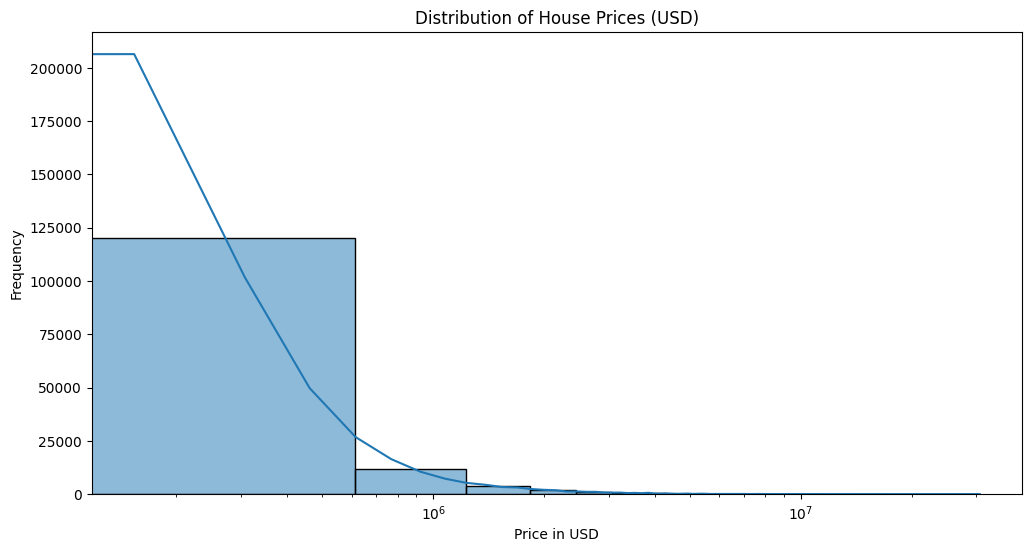

In [ ]:
# Distribution of 'price_in_USD'
plt.figure(figsize=(12, 6))
sns.histplot(df['price_in_USD'], bins=50, kde=True)
plt.title('Distribution of House Prices (USD)')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

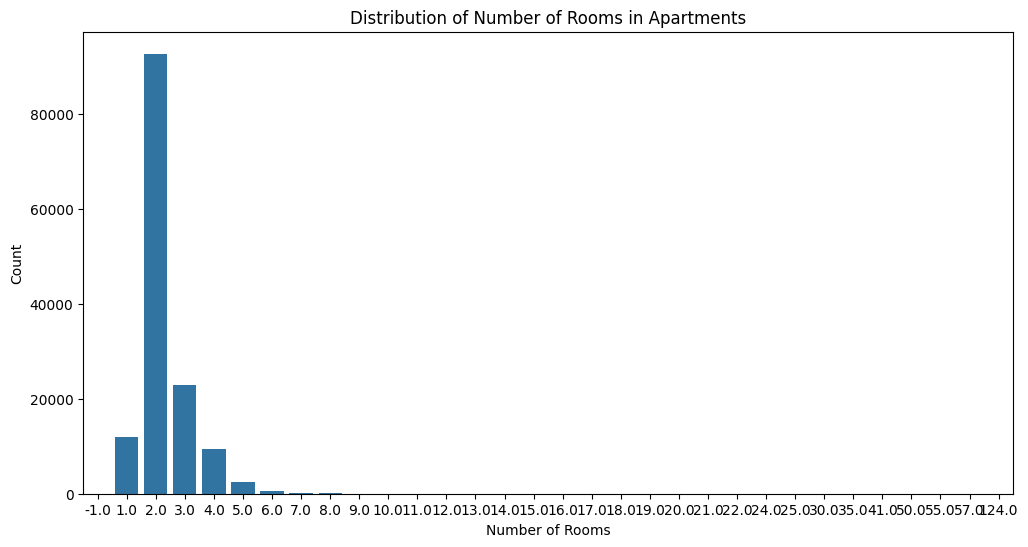

In [ ]:
# Distribution of 'apartment_rooms'
plt.figure(figsize=(12, 6))
sns.countplot(x='apartment_rooms', data=df)
plt.title('Distribution of Number of Rooms in Apartments')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.show()

# Exploratory Data Analysis (EDA) for Correlation

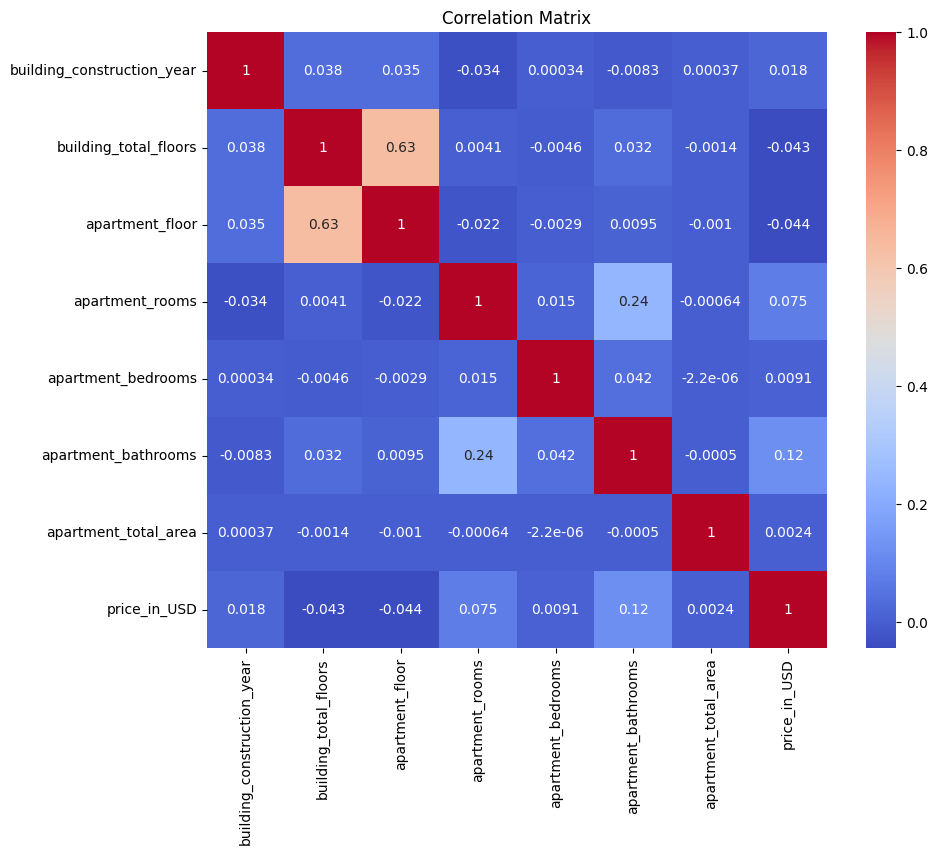

In [ ]:
# Calculate correlation matrix for numerical features
corr_matrix = df[numerical_columns + ['price_in_USD']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Identify highly correlated features
high_corr = corr_matrix[corr_matrix.abs() > 0.5].dropna(axis=0, how='all').dropna(axis=1, how='all')
print("Highly Correlated Features:\n", high_corr)

Highly Correlated Features:
                             building_construction_year  building_total_floors  \
building_construction_year                         1.0                    NaN   
building_total_floors                              NaN               1.000000   
apartment_floor                                    NaN               0.633976   
apartment_rooms                                    NaN                    NaN   
apartment_bedrooms                                 NaN                    NaN   
apartment_bathrooms                                NaN                    NaN   
apartment_total_area                               NaN                    NaN   
price_in_USD                                       NaN                    NaN   

                            apartment_floor  apartment_rooms  \
building_construction_year              NaN              NaN   
building_total_floors              0.633976              NaN   
apartment_floor                    1.000000      

# Removing Outliers Using IQR

<Axes: xlabel='apartment_floor'>

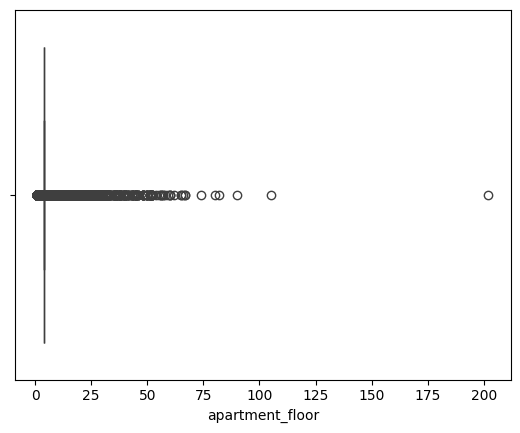

In [ ]:
import seaborn as sns

sns.boxplot(x=df['apartment_floor'])


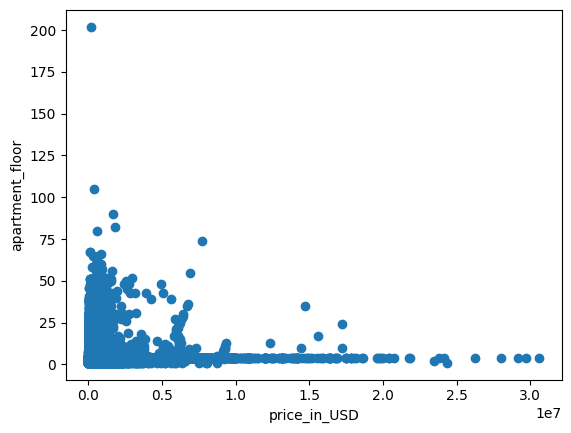

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['price_in_USD'], df['apartment_floor'])
plt.xlabel('price_in_USD')
plt.ylabel('apartment_floor')
plt.show()


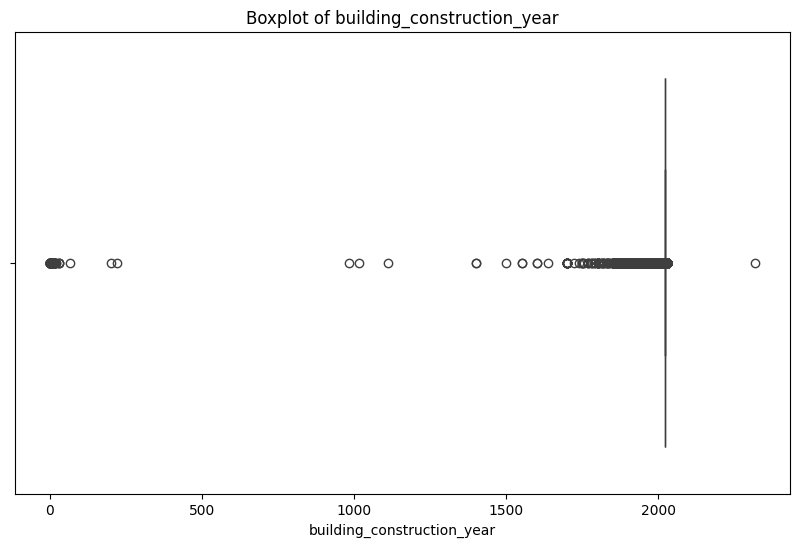

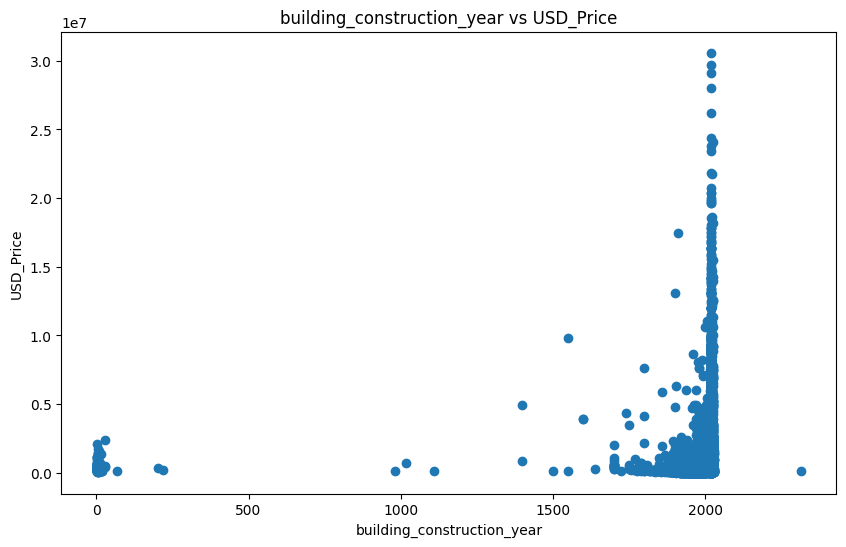

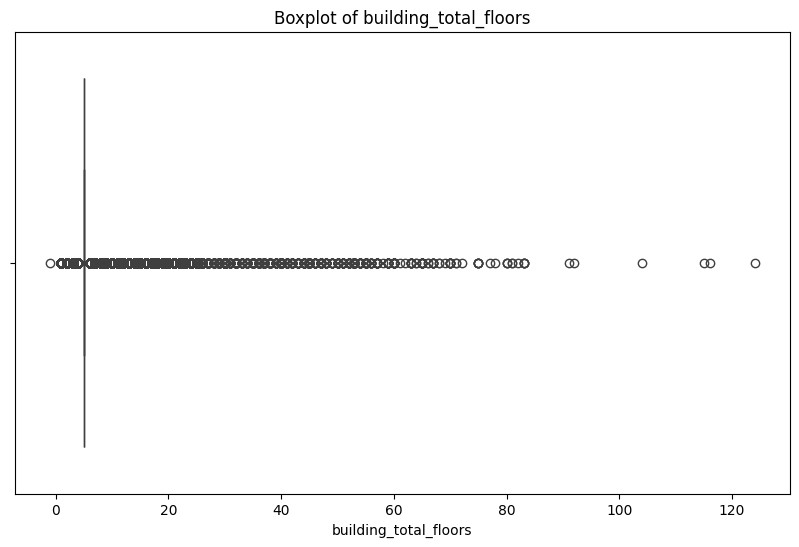

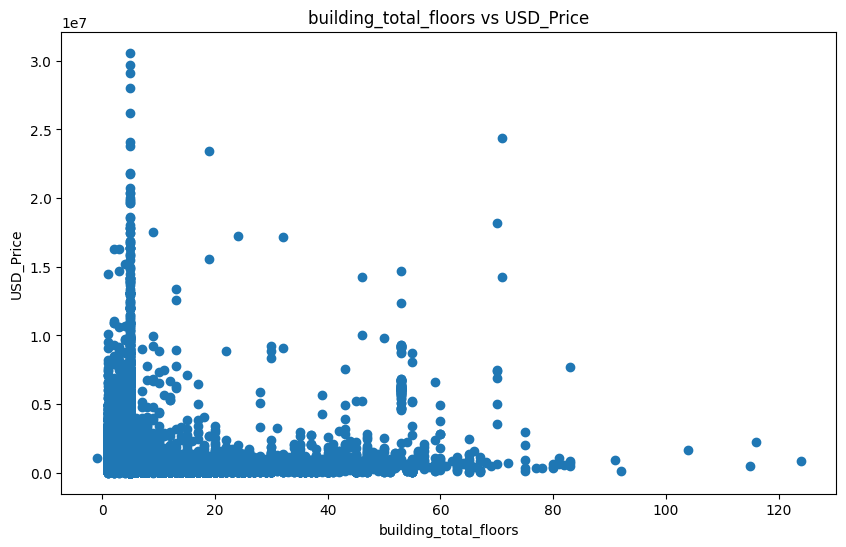

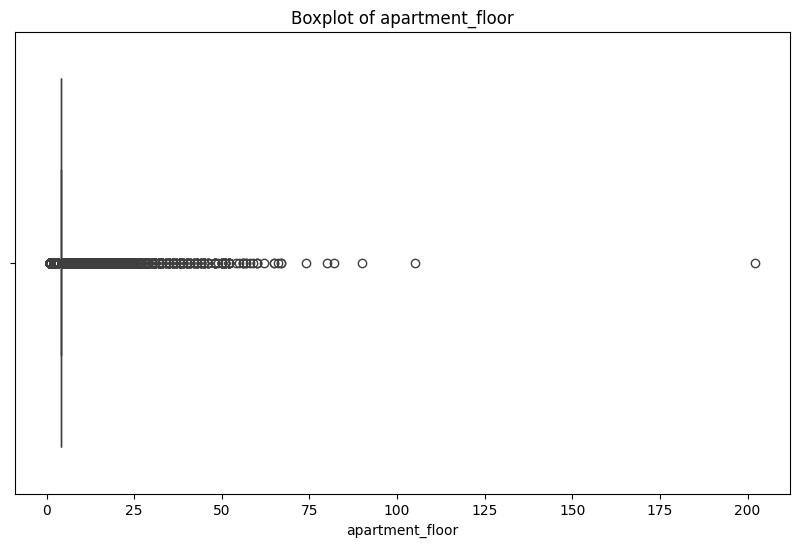

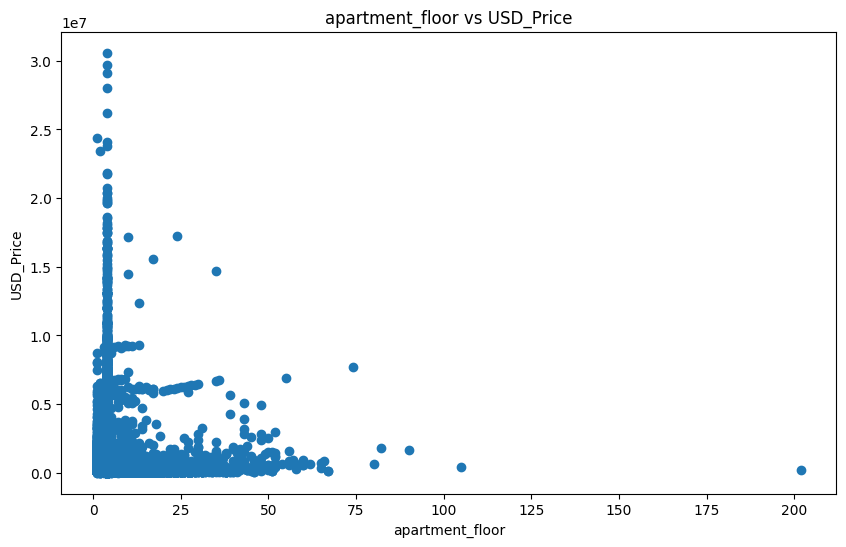

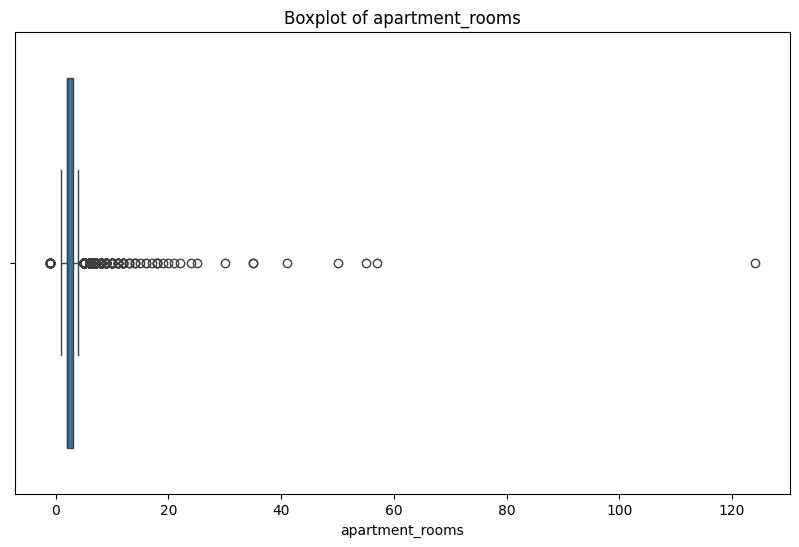

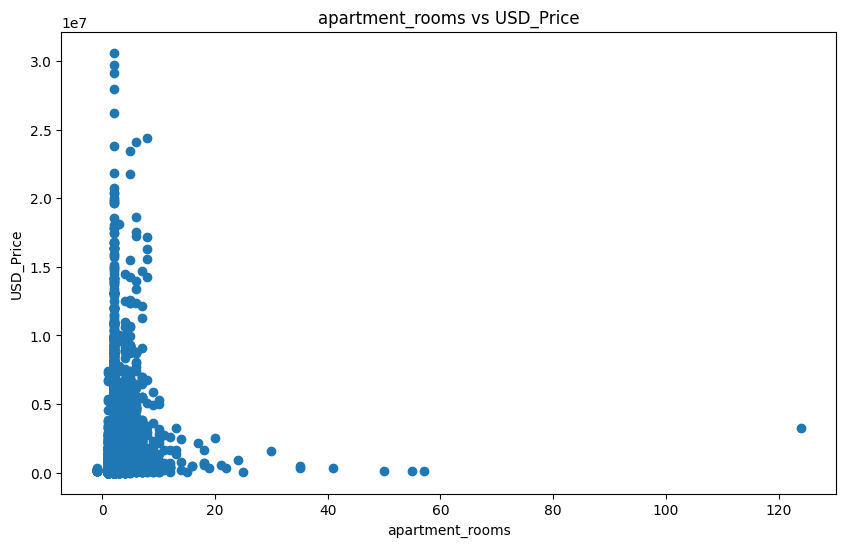

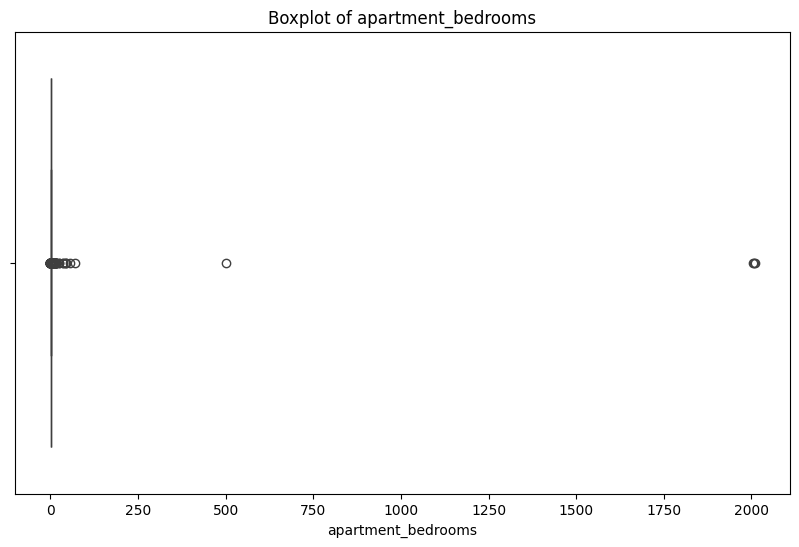

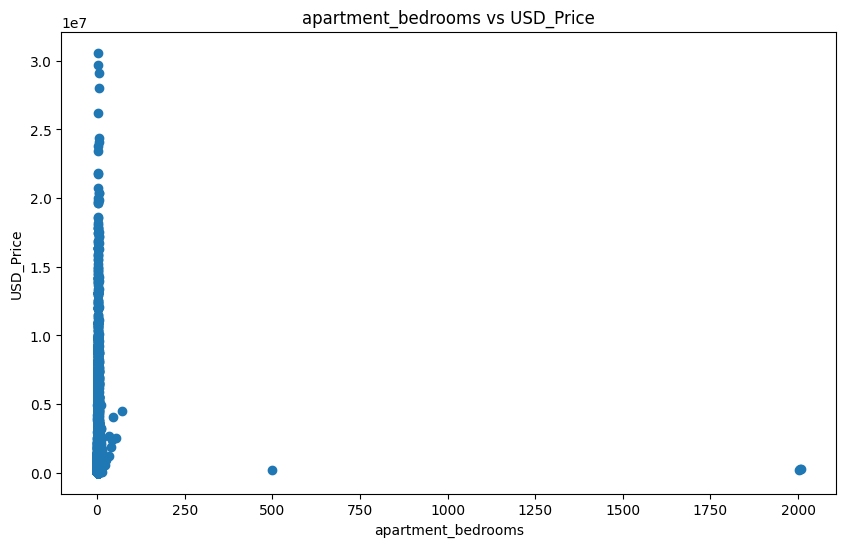

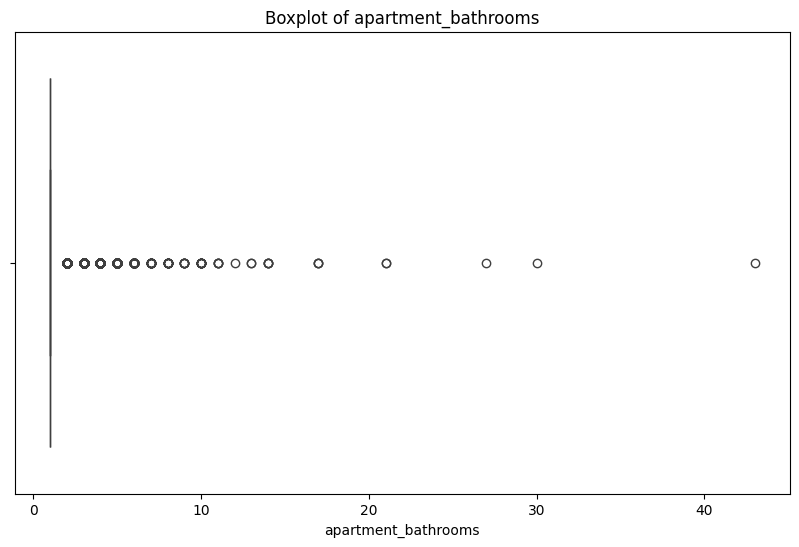

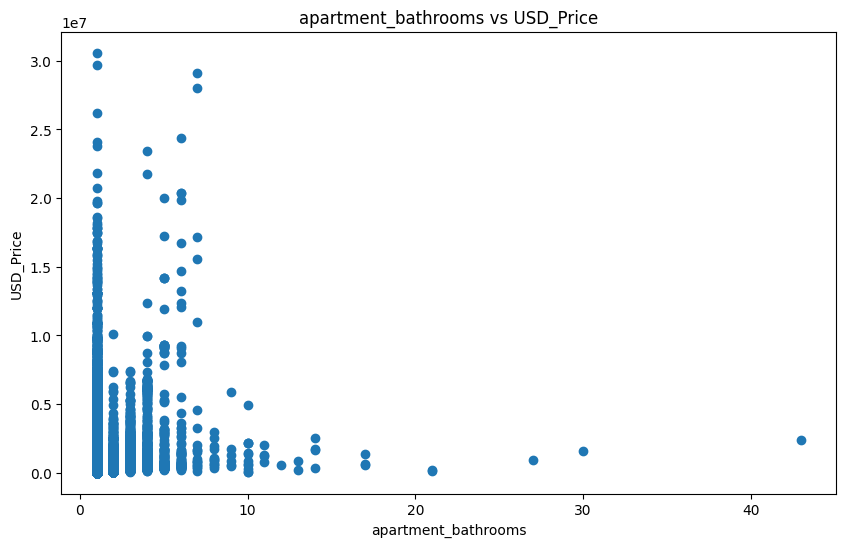

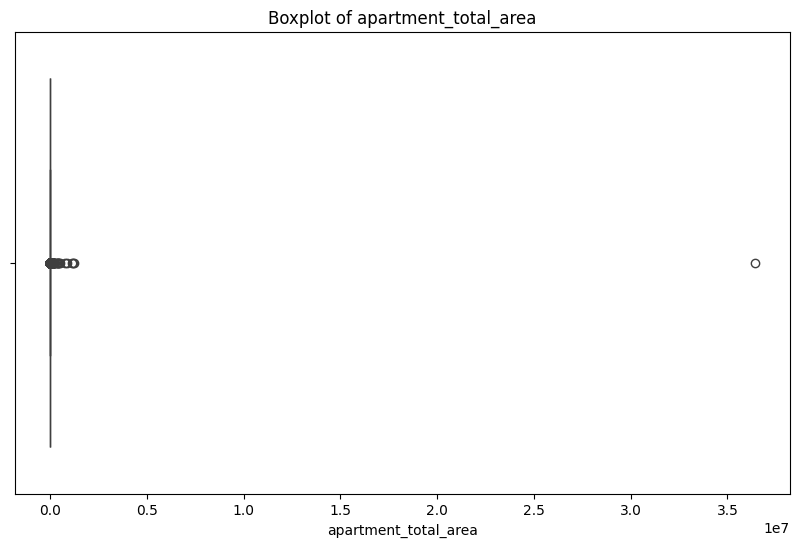

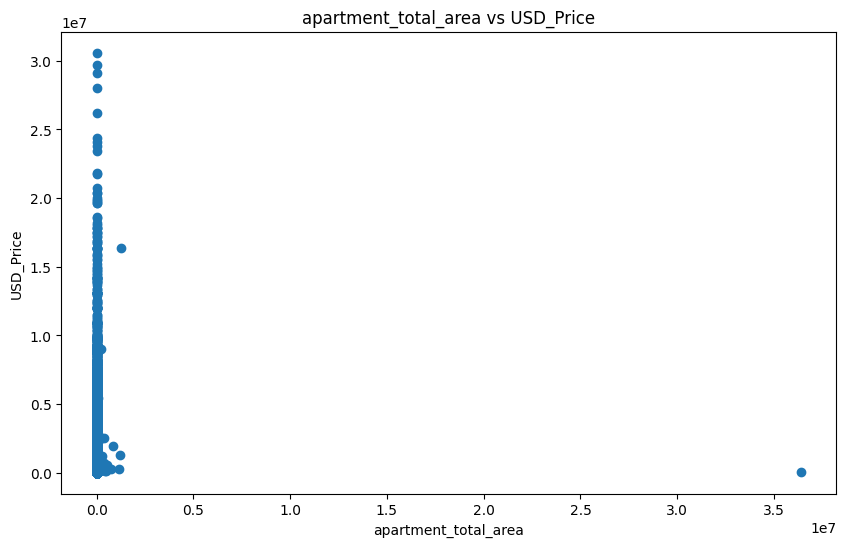

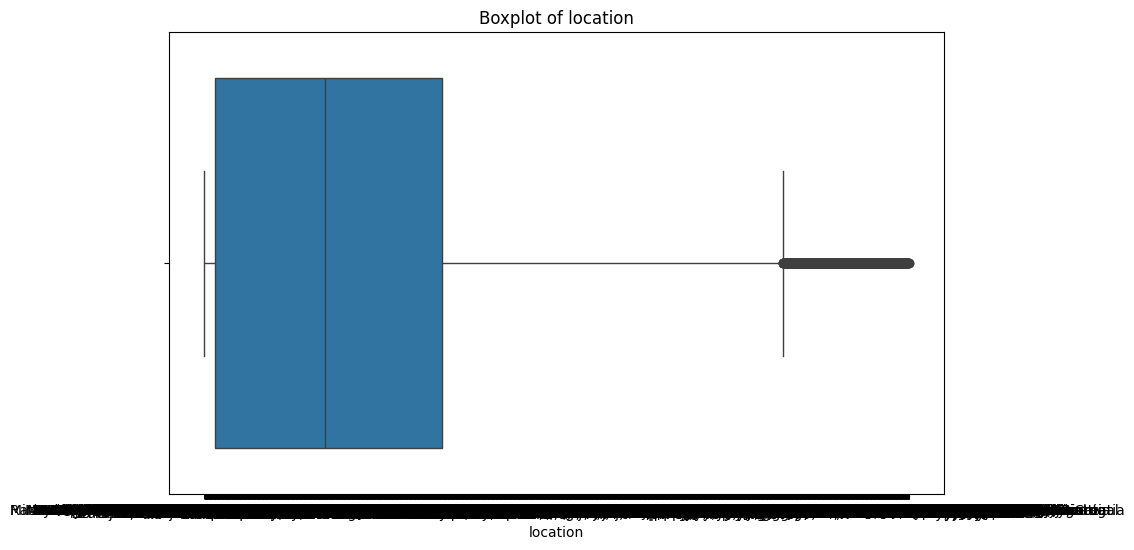

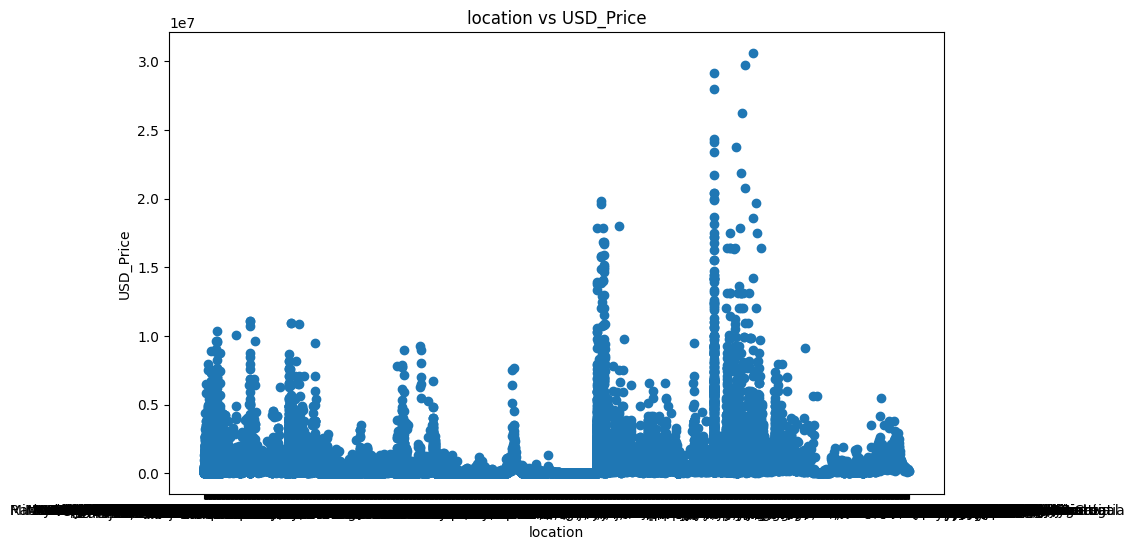

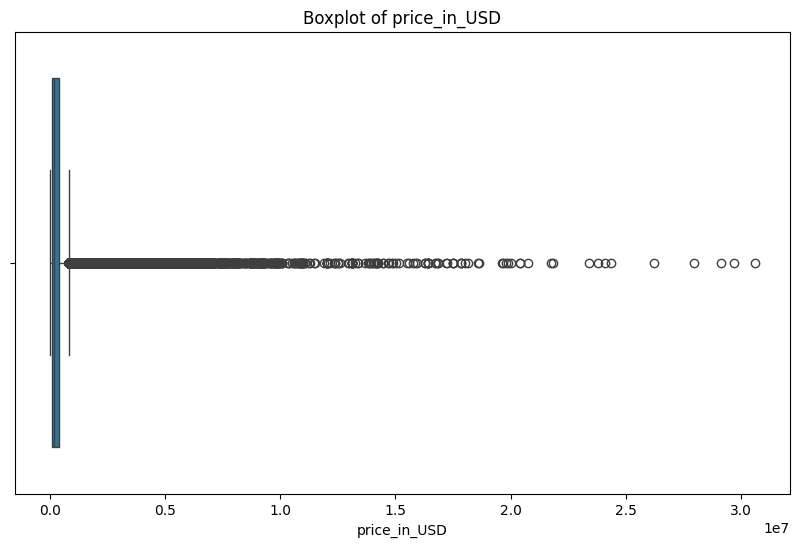

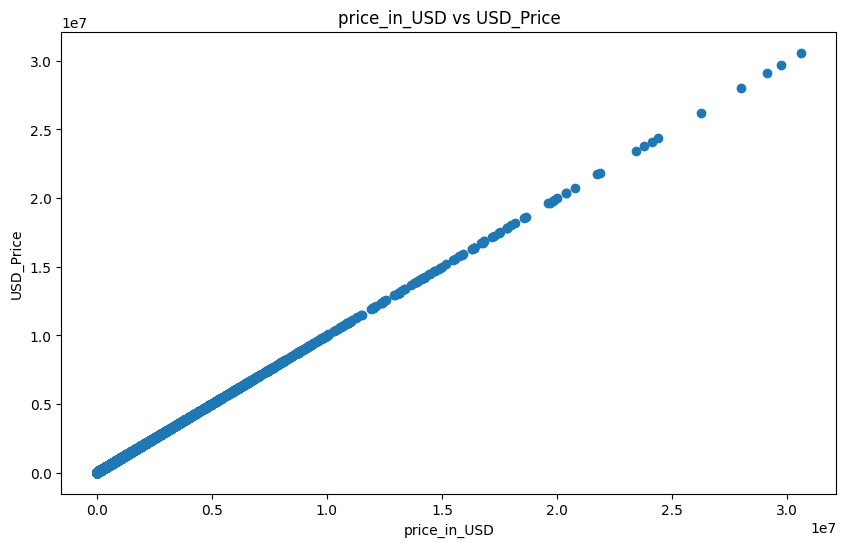

In [ ]:
for feature in df:
    # Boxplot for the feature
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

    # Scatter plot comparing the feature with USD_Price
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['price_in_USD'])
    plt.xlabel(feature)
    plt.ylabel('USD_Price')
    plt.title(f'{feature} vs USD_Price')
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140255 entries, 0 to 147535
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   building_construction_year  140255 non-null  float64
 1   building_total_floors       140255 non-null  float64
 2   apartment_floor             140255 non-null  float64
 3   apartment_rooms             140255 non-null  float64
 4   apartment_bedrooms          140255 non-null  float64
 5   apartment_bathrooms         140255 non-null  float64
 6   apartment_total_area        140255 non-null  int64  
 7   location                    140255 non-null  object 
 8   price_in_USD                140255 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.7+ MB


In [ ]:
# Select numerical columns (float and int types)
selected_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

def remove_outliers(df, column_list):
    """
    Remove outliers from a dataframe based on the IQR method.
    Only numerical columns specified in 'column_list' are considered.

    Parameters:
    df (DataFrame): The DataFrame to process.
    column_list (list): List of numerical column names to check for outliers.

    Returns:
    DataFrame: A new DataFrame with outliers removed.
    """
    df_copy = df.copy()  # Work on a copy of the DataFrame to preserve the original data
    for column in column_list:
        Q1 = df_copy[column].quantile(0.10)
        Q3 = df_copy[column].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Applying the filter for the IQR
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]

    return df_copy

# Apply the function to remove outliers
df_cleaned = remove_outliers(df, selected_cols)

# 'df_cleaned' now has outliers removed from specified numerical columns
df_cleaned

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,location,price_in_USD
1,2021.0,2.0,4.0,2.0,2.0,1.0,500,"Mediterranean Region, Kas, Turkey",1108667.0
5,2026.0,5.0,4.0,1.0,2.0,1.0,28,"Abkhazia, Batumi, Georgia",35622.0
8,2021.0,5.0,4.0,2.0,2.0,1.0,74,"Ratisevina-Suscepan-Trebesin, Herceg Novi, Mon...",168881.0
11,2021.0,4.0,4.0,2.0,2.0,1.0,48,"Herceg Novi, Montenegro",297706.0
12,2021.0,2.0,4.0,2.0,2.0,1.0,312,"Vilnius, Vilnius city municipality, Lithuania",693045.0
...,...,...,...,...,...,...,...,...,...
147523,2023.0,5.0,4.0,4.0,2.0,1.0,215,"Marmara Region, Istanbul, Turkey",619549.0
147524,2021.0,5.0,5.0,3.0,2.0,1.0,91,"Mediterranean Region, Alanya, Turkey",319316.0
147526,2021.0,3.0,3.0,4.0,2.0,1.0,113,"Marmara Region, Turkey",808464.0
147528,2021.0,5.0,5.0,4.0,2.0,1.0,170,"Sekerhane Mahallesi, Alanya, Turkey",763379.0


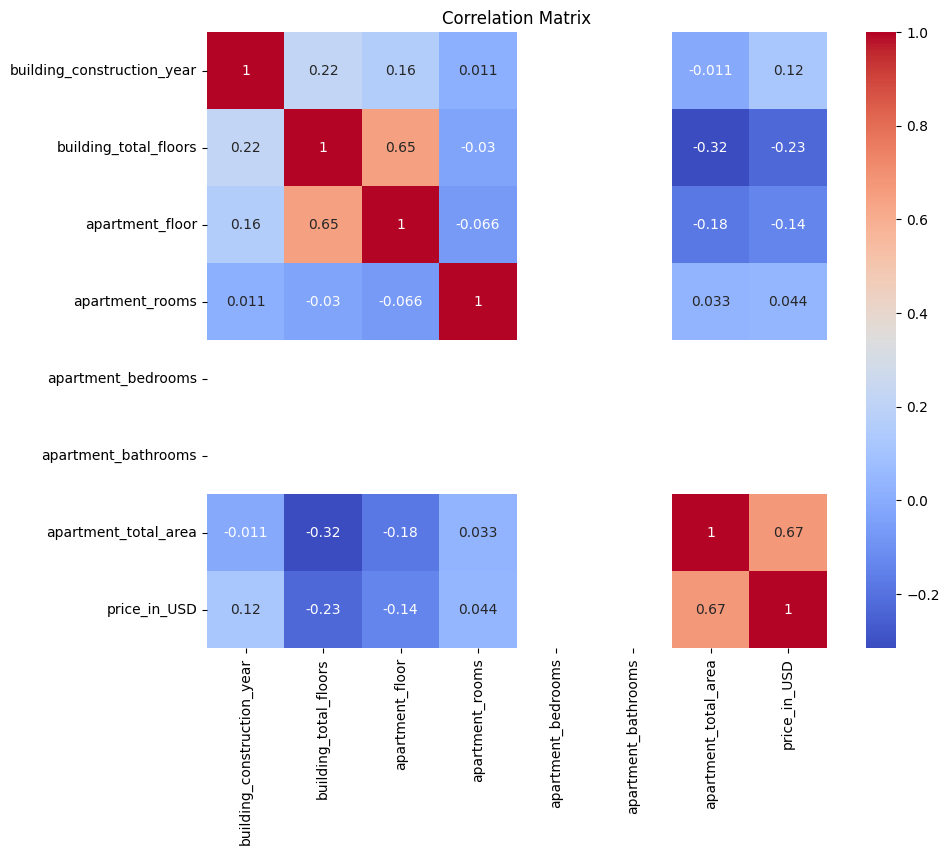

In [ ]:
# Calculate correlation matrix for numerical features
corr_matrix = df_cleaned[numerical_columns + ['price_in_USD']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_cleaned.corr()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,price_in_USD
building_construction_year,1.000000,0.220286,0.160715,0.010709,NaN,NaN,-0.010599,0.124308
building_total_floors,0.220286,1.000000,0.648198,-0.030075,NaN,NaN,-0.315576,-0.230102
apartment_floor,0.160715,0.648198,1.000000,-0.066284,NaN,NaN,-0.180576,-0.139284
apartment_rooms,0.010709,-0.030075,-0.066284,1.000000,NaN,NaN,0.032739,0.044031
apartment_bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apartment_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apartment_total_area,-0.010599,-0.315576,-0.180576,0.032739,NaN,NaN,1.000000,0.671918
price_in_USD,0.124308,-0.230102,-0.139284,0.044031,NaN,NaN,0.671918,1.000000


# Splitting the dataset into training and testing sets


In [ ]:
X = df.drop('price_in_USD', axis=1)
y = df['price_in_USD']

# Train Test Split and r2 Score import liberies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

# Feature Engineering

In [ ]:
# Encoding categorical variables with LabelEncoder
categorical_features = ['location']
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

In [ ]:
# Preprocessing - Scale numerical features
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

In [ ]:
# Selecting relevant features and target variable
features = categorical_features + numerical_columns
X = df_cleaned[features]
y = df_cleaned['price_in_USD']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Import Models Liberies

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
werwwe23cds

In [ ]:
# Regression Model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                                             ('linear', LinearRegression())]),
    'SVR': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'KNN Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Gaussian Process Regression': GaussianProcessRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

In [ ]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('model',model)])
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    results[name] = {'R2 Train': r2_train, 'R2 Test': r2_test}


In [ ]:
# Display Results
results_df = pd.DataFrame(results).T
print(results_df)

In [ ]:
# Plotting model performance
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

# 1. Cross-Validation for Multiple Models


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingRegressor

In [ ]:
# Define a function to perform cross-validation
def evaluate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    return scores

In [ ]:
# Regression Model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                                             ('linear', LinearRegression())]),
    #'SVR': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor()
}

In [ ]:
'Bayesian Ridge Regression': BayesianRidge(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'KNN Regressor': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Gaussian Process Regression': GaussianProcessRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()

In [ ]:
# Setting up K-Fold
kf = KFold(n_splits=7, shuffle=True, random_state=3)

In [ ]:
# Evaluate each model using cross-validation
model_scores = {}
for name, model in models.items():
    scores = evaluate_model(model, X, y, kf)
    model_scores[name] = scores
    print(f"{name}: Mean R2 = {np.mean(scores):.3f}, Std = {np.std(scores):.3f}")

Linear Regression: Mean R2 = 0.472, Std = 0.006
Ridge Regression: Mean R2 = 0.472, Std = 0.006
Lasso Regression: Mean R2 = 0.472, Std = 0.006
Elastic Net Regression: Mean R2 = 0.422, Std = 0.004
Polynomial Regression: Mean R2 = 0.498, Std = 0.005
Decision Tree Regressor: Mean R2 = 0.423, Std = 0.013
Random Forest Regressor: Mean R2 = 0.611, Std = 0.006
Extra Trees Regressor: Mean R2 = 0.553, Std = 0.009


# Model Ensembling - Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
# Define base learners
base_learners = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Elastic Net Regression', ElasticNet()),
    ('Polynomial Regression ', Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                                              ('linear', LinearRegression())])),
    ('SVR', SVR(kernel='rbf')),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Extra Trees Regressor', ExtraTreesRegressor())
]

# Define meta-learner
meta_learner = GradientBoostingRegressor()

# Stacking model
stacked_model = StackingRegressor(estimatomrs=base_learners, final_estimator=meta_learner)

In [ ]:
# evaluation function call (implement evaluate_model according to your needs)
stacked_scores = evaluate_model(stacked_model, X, y, kf)

In [ ]:
print(f"Stacked Model: Mean R2 = {np.mean(stacked_scores):.3f}, Std = {np.std(stacked_scores):.3f}")

In [ ]:
# Define base learners
base_learners = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Elastic Net Regression', ElasticNet()),
    ('Polynomial Regression', Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                                              ('linear', LinearRegression())])),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Extra Trees Regressor', ExtraTreesRegressor())
]

In [ ]:
# Define meta-learner
meta_learner = GradientBoostingRegressor()

In [ ]:
# Stacking model
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

In [ ]:
# Fit the model on the training data
stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('Ridge Regression', Ridge()),
                              ('Lasso Regression', Lasso()),
                              ('Elastic Net Regression', ElasticNet()),
                              ('Polynomial Regression',
                               Pipeline(steps=[('poly', PolynomialFeatures()),
                                               ('linear',
                                                LinearRegression())])),
                              ('Decision Tree Regressor',
                               DecisionTreeRegressor()),
                              ('Random Forest Regressor',
                               RandomForestRegressor()),
                              ('Extra Trees Regressor', ExtraTreesRegressor())],
                  final_estimator=GradientBoostingRegressor())

In [ ]:
# Predict on training and testing data
y_train_pred = stacked_model.predict(X_train)
y_test_pred = stacked_model.predict(X_test)

In [ ]:
training_r2score = r2_score(y_train, y_train_pred)
testing_r2score=r2_score(y_test, y_test_pred)

In [ ]:
# Calculate and print the R2 score
print("Training R2 score:", training_r2score)
print("Testing R2 score:", testing_r2score)

Training R2 score: 0.8547965120100952
Testing R2 score: 0.6976455413502607


In [ ]:
# Calculate and print the RMSE
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training RMSE: 125494.74371599463
Testing RMSE: 185126.51783760416


# Hyperparameter tuning for one of the base learners (e.g., XGBoost)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter XGBoost

In [ ]:
# Define the parameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],  # Number of gradient boosted trees. Equivalent to number of boosting rounds.
    'max_depth': [3, 5, 7, 9],  # Maximum tree depth for base learners.
    'learning_rate': [0.001, 0.01, 0.1]  # Boosting learning rate (xgb's "eta")
}

# Initialize the XGBoost regressor and GridSearchCV
xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), xgb_params, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
xgb_grid.fit(X_train, y_train)

# Retrieve the best estimator
best_xgb = xgb_grid.best_estimator_

# Print the best parameters
print("Best parameters found: ", xgb_grid.best_params_)

# Evaluate the best model on the training set
# evaluate the best model on the test set
training_score = best_xgb.score(X_train, y_train)
test_score = best_xgb.score(X_test, y_test)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")

# SVR

In [ ]:
# Set up SVR with RBF kernel
svr = SVR(kernel='rbf')
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient for 'rbf'
    'epsilon': [0.01, 0.1, 0.5, 1, 2]  # Epsilon in the epsilon-SVR model
}
# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameter set found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_svr_model = grid_search.best_estimator_

# Evaluate the model
test_score = best_svr_model.score(X_test, y_test)
training_score = best_svr_model.score(X_train, y_train)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits


# LGBMRegressor

In [ ]:
# Initialize an LGBMRegressor
lgbm = LGBMRegressor()

# Define a search space for GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [10, 20, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],  # Fraction of samples to be used for fitting
    'colsample_bytree': [0.8, 1.0],  # Fraction of features to be used
}

# Setup GridSearchCV
grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_lgbm_model = grid_search.best_estimator_

# Evaluate the model
test_score = best_lgbm_model.score(X_test, y_test)
training_score = best_lgbm_model.score(X_train, y_train)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")

# CatBoostRegressor

In [ ]:
# Initialize a CatBoostRegressor model
catboost_model = CatBoostRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train, verbose=False)

# Best parameter set found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_catboost_model = grid_search.best_estimator_

# Evaluate the model using the test set
test_score = best_catboost_model.score(X_test, y_test)
training_score = best_catboost_model.score(X_train, y_train)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")

# KNeighborsRegressor()

In [ ]:
# Initialize KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_knn_model = grid_search.best_estimator_

# Evaluate the model using the test set
test_score = best_knn_model.score(X_test, y_test)
training_score = best_knn_model.score(X_train, y_train)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")

# GradientBoostingRegressor()

In [ ]:
# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameter set found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_gbr_model = grid_search.best_estimator_

# Evaluate the model using the test set
test_score = best_gbr_model.score(X_test, y_test)
training_score = best_gbr_model.score(X_train, y_train)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")

# AdaBoostRegressor()

In [ ]:
# Initialize the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)

# Set up AdaBoostRegressor
ada_boost = AdaBoostRegressor(base_estimator=base_estimator)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential']
}

# Set up GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameter set found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_ada_model = grid_search.best_estimator_

# Evaluate the model using the test set
test_score = best_ada_model.score(X_test, y_test)
training_score = best_ada_model.score(X_train, y_train)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")


# GaussianProcessRegressor()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, RationalQuadratic

In [ ]:
# Define a basic kernel with parameters that can be optimized
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
        + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True)

# Fit the model
gpr.fit(X_train, y_train)

# Evaluate the model
print("Model Score: ", gpr.score(X_test, y_test))

# Use GridSearchCV for hyperparameter tuning (example)
param_grid = {"alpha": [1e-2, 1e-1, 1, 1e+1],
               "kernel": [1.0 * RBF(length_scale=l) for l in np.logspace(-2, 2, 5)]}

grid_search = GridSearchCV(gpr, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Best model
best_gpr_model = grid_search.best_estimator_

# Evaluate the model using the test set
test_score = best_gpr_model.score(X_test, y_test)
training_score = best_gpr_model.score(X_train, y_train)

print(f"R^2 on training set: {training_score}")
print(f"R^2 on test set: {test_score}")

In [ ]:
# Define base learners
base_learners = [
    ('Bayesian Ridge Regression', BayesianRidge()),
    ('XGBoost', best_xgb),  # Using the best XGBoost model from grid search
    ('LightGBM', best_lgbm_model),
    ('CatBoost', best_catboost_model),
    ('KNN Regressor', best_knn_model),
    ('SVR', best_svr_model),
    ('Gradient Boosting Regressor', best_gbr_model),
    #('Gaussian Process Regression', best_gpr_model),
    ('AdaBoost Regressor', best_ada_model),
]

In [ ]:
# Define meta-learner
meta_learner = GradientBoostingRegressor()

In [ ]:
# Stacking model
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

In [ ]:
# Fit the model on the training data
stacked_model.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 79424, number of used features: 6
[LightGBM] [Info] Start training from score 277297.497847
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 63539, number of used features: 6
[LightGBM] [Info] Start training from score 276936.513086
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 63539, number of used features: 6
[LightGBM] [Info] Start training from score 278558.160673
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 63539, number of used features: 6
[LightGBM] [Info] Start training from score 277036.912369
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 63539, number of used features: 6
[LightGBM] [Info] Start training from score 277048.146209
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train

StackingRegressor(estimators=[('Bayesian Ridge Regression', BayesianRidge()),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_ty...
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('LightGBM', LGBMRegressor(force_col_wise=True)),
                              ('CatBoost',
                               <catboost.core.CatBoostRegressor object at 0x7938b910c730>),
                              ('KNN Regressor', KNeighborsRegressor()),
                              ('SVR', SVR()),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor()),
                              ('AdaBoost Regressor', AdaBoostRegressor())],
                  final_estimator=GradientBoostingRegressor())

In [ ]:
# Predict on training and testing data
y_train_pred = stacked_model.predict(X_train)
y_test_pred = stacked_model.predict(X_test)

In [ ]:
# Calculate and print the R2 score and RMSE
print("Training R2 score:", r2_score(y_train, y_train_pred))
print("Testing R2 score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training R2 score: 0.7468480076745244
Testing R2 score: 0.6751577010380947
Training RMSE: 150756.32930636586
Testing RMSE: 173313.231112638


# model with some  basic hypertuning parameters

In [ ]:
# Define optimized base learners (assuming hyperparameters are tuned)
base_learners = [
    ('Bayesian Ridge Regression', BayesianRidge()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)),
    ('LightGBM', LGBMRegressor(n_estimators=100, learning_rate=0.05)),
    ('CatBoost', CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, verbose=0)),
    ('KNN Regressor', KNeighborsRegressor(n_neighbors=5)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)),
    ('SVR', SVR()),
   #('Gaussian Process Regression', GaussianProcessRegressor(normalize_y=True)),
    ('AdaBoost Regressor', AdaBoostRegressor(n_estimators=100))
]

In [ ]:
# Define and tune the meta-learner
meta_learner = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05)

In [ ]:
# Stacking model with optimized learners
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)


In [ ]:
# Fit the model
stacked_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 79424, number of used features: 6
[LightGBM] [Info] Start training from score 277297.497847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 63539, number of used features: 6
[LightGBM] [Info] Start training from score 276936.513086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] To

StackingRegressor(estimators=[('Bayesian Ridge Regression', BayesianRidge()),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_ty...
                              ('LightGBM', LGBMRegressor(learning_rate=0.05)),
                              ('CatBoost',
                               <catboost.core.CatBoostRegressor object at 0x7938b910dfc0>),
                              ('KNN Regressor', KNeighborsRegressor()),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor()),
                              ('SVR', SVR()),
                              ('AdaBoost Regressor',
                               AdaBoostRegressor(n_estimators=100))],
                  final_estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                            n_estimators=50))

In [ ]:
# Predict and evaluate
y_train_pred = stacked_model.predict(X_train)
y_test_pred = stacked_model.predict(X_test)

In [ ]:
print("Training R2 score:", r2_score(y_train, y_train_pred))
print("Testing R2 score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training R2 score: 0.7248723062560409
Testing R2 score: 0.6620133379138209
Training RMSE: 157163.6236190824
Testing RMSE: 176784.9183723103
